## Code to create the barplots used to depict instrain data
- Compare PIGEON vOTUs to all BodegaBay vOTUs
- Compare BB2019 and BB2021 vOTUs
- Compare 2021 vOTUs from all 3 diff sampling timepoints

In [31]:
# Load libraries
library(dplyr)
library(vegan)
library(tibble)
library(tidyr)
library(ggplot2)
library(RColorBrewer)
library(tidyverse)
library(dplyr)
library(broom)
library(rstatix)
library(plyr)

In [38]:
# open ALL comparisons
df = read.table("../new_pigeon_mapping/instrain/221205_yearyear_concat_pigeon.csv", 
              sep=",", header=T)#, row.names=1)


## PIGEON - BODEGA BAY COMPARISONS

null device 
          1

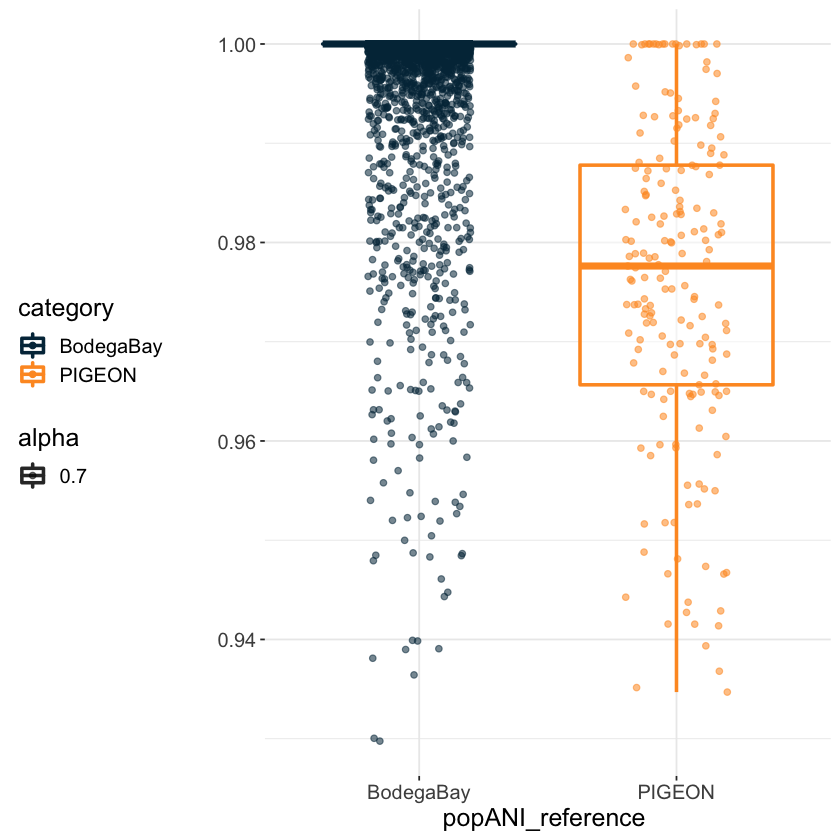

In [8]:
#pdf('../plots/popani_bb_pigeon.pdf', width = 8, height = 8)
ponani.p <- df%>%  
  ggplot(aes(as.numeric(popANI_reference), category, color = category, alpha=0.7)) +
 geom_boxplot(size = 1, outlier.shape = NA) +
    ylab("popANI_reference ") +
  xlab("") +
  coord_flip() +
  scale_color_manual(values = c("#023047", "#fe9929", 'blue')) +
  theme_bw() +
  geom_point(position=position_jitterdodge()) +
  #geom_jitter() +
  #scale_y_log10() +
  #facet_grid('year_scaffold') +
  theme(text = element_text(size = 15),
        panel.border = element_blank(), 
        strip.background = element_blank(),
        strip.text = element_blank(),
        legend.position = "left")
ponani.p
dev.off()

## Bodega Bay 2021 vs 2019 comparisons

In [39]:
# Remove PIGEON comparisons
df_nopig <- subset(df, category != 'PIGEON')


Warning message:
“Removed 597 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 597 rows containing missing values (geom_point).”


null device 
          1

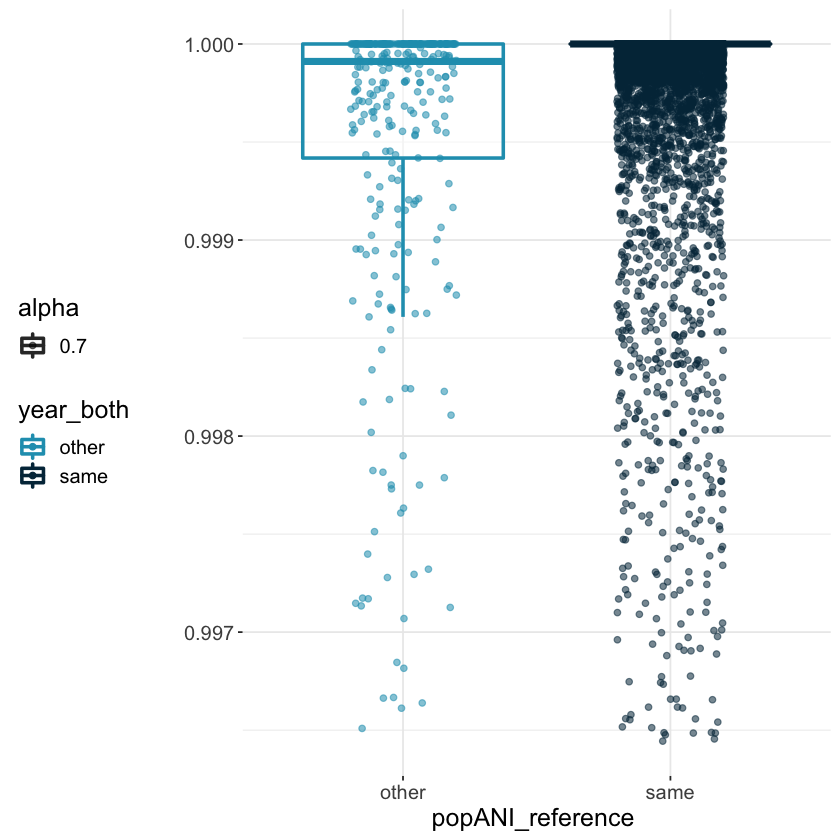

In [11]:
#pdf('../plots/popani_202119.pdf', width = 8, height = 8)
ponani.p <- df_nopig%>%  
  ggplot(aes(as.numeric(popANI_reference), year_both, color = year_both, alpha=0.7)) +
 geom_boxplot(size = 1, outlier.shape = NA) +
    ylab("popANI_reference ") +
  xlab("") +
  coord_flip() +
  scale_color_manual(values = c("#219ebc", "#023047", "#666666", 'blue')) +
  theme_bw() +
  geom_point(position=position_jitterdodge()) +
  #geom_jitter() +
  #scale_y_log10() +
  #facet_grid('year_scaffold') +
  theme(text = element_text(size = 15),
        panel.border = element_blank(), 
        strip.background = element_blank(),
        strip.text = element_blank(),
        legend.position = "left")
ponani.p
dev.off()

## Timepoints within 2021
- Sampled 3x within 2021
- March, May, July
- Look at population diversity between these timepoints

In [41]:
# open comparisons between the timepoints
df_2021 = read.table("../new_pigeon_mapping/instrain/221013_timepoints_concat_wi_sites.csv", 
              sep=",", header=T)

In [29]:
#pdf('../plots/popani_2021.pdf', width = 8, height = 8)
ponani.p <- df_2021 %>%  
  ggplot(aes(as.numeric(popANI_reference), time_both, color = time_both, alpha=0.7)) +
 geom_boxplot(size = 1, outlier.shape = NA) +
    ylab("popANI_reference ") +
  xlab("") +
  coord_flip() +
  scale_color_manual(values = c("#66a61e", "#e7298a", "#666666", 'blue')) +
  theme_bw() +
  geom_point(position=position_jitterdodge()) +
  #geom_jitter() +
  #scale_y_log10() +
  #facet_grid('year_scaffold') +
  theme(text = element_text(size = 15),
        panel.border = element_blank(), 
        strip.background = element_blank(),
        strip.text = element_blank(),
        legend.position = "left")
ponani.p
dev.off()

## Do statistics for the categories
- Compare population ANI between PIGEON and all Bodega Bay
- Compare population ANI between BodegaBay 2019 and Bodega Bay 2021
- Compare population ANI between the 3 2021 timepoints
- Do T-Tests to compare these

In [33]:
# t-test for PIGEON and BB
# Make 2 categories, BB and PIGEON
total_1921 = df[df$category=='BodegaBay',]
total_pigeon = df[df$category=='PIGEON',]

# Compare the 2
t.test(total_1921$popANI_reference, total_pigeon$popANI_reference, 
       alternative = "two.sided", var.equal = FALSE)




	Welch Two Sample t-test

data:  total_1921$popANI_reference and total_pigeon$popANI_reference
t = 19.777, df = 188.22, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02108944 0.02576257
sample estimates:
mean of x mean of y 
0.9993659 0.9759399 


In [40]:
# t-test for BB 2019 and BB 2021
# Make 2 categories, 2019 and 2021
tsameyear = df_nopig[df_nopig$year_both=='same',]
tdiffyear = df_nopig[df_nopig$year_both=='other',]

# Do t-test
t.test(tsameyear$popANI_reference, tdiffyear$popANI_reference, 
       alternative = "two.sided", var.equal = FALSE)




	Welch Two Sample t-test

data:  tsameyear$popANI_reference and tdiffyear$popANI_reference
t = 9.5732, df = 461.23, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.003906736 0.005924904
sample estimates:
mean of x mean of y 
0.9994958 0.9945800 


In [44]:
# t-test
# Make categories
tsame = df_2021[df_2021$time_both=='same',]
t1 = df_2021[df_2021$time_both=='T+1',]
t2 = df_2021[df_2021$time_both=='T+2',]

# Do t-test
t.test(tsame$popANI_reference, t1$popANI_reference, alternative = "two.sided", var.equal = FALSE)
t.test(tsame$popANI_reference, t2$popANI_reference, alternative = "two.sided", var.equal = FALSE)
t.test(t1$popANI_reference, t2$popANI_reference, alternative = "two.sided", var.equal = FALSE)



	Welch Two Sample t-test

data:  tsame$popANI_reference and t1$popANI_reference
t = 4.9179, df = 6516.2, p-value = 8.962e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0002740663 0.0006373787
sample estimates:
mean of x mean of y 
0.9995189 0.9990632 



	Welch Two Sample t-test

data:  tsame$popANI_reference and t2$popANI_reference
t = 6.4824, df = 5868.5, p-value = 9.764e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0004896884 0.0009142635
sample estimates:
mean of x mean of y 
0.9995189 0.9988170 



	Welch Two Sample t-test

data:  t1$popANI_reference and t2$popANI_reference
t = 1.9018, df = 8252, p-value = 0.05723
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.566724e-06  5.000736e-04
sample estimates:
mean of x mean of y 
0.9990632 0.9988170 
